In [52]:
import numpy as np
import pandas as pd
import h5py
import pathlib
import scipy.io
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from umap.umap_ import UMAP
import seaborn as sns
# sns.set_theme(style="darkgrid")
import plotly.express as px
from lpproj import LocalityPreservingProjection

In [2]:

dataPath = str(pathlib.Path().resolve().parent.absolute()) + '\Output' #get path where data is located, parent folder and then output folder

folder = "\\noSpikeGeneration_test2\\"

print(dataPath + folder) #cfd

C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\


Import v7.3 matlab files, unneccesary

In [3]:
# data_dict = scipy.io.loadmat(dataPath + folder + '\Win_0.5G_10Q_1Winp_1Pexc_0Acc_1Seed_42.mat')
data_dict = scipy.io.loadmat(dataPath + '\\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_1Seed_42.mat')

In [4]:
print(dataPath + folder + '\Win_0.5G_10Q_1Winp_1Pexc_0Acc_1Seed_42.mat')
print('C:\\Users\\thijs\\OneDrive\\thesis\\Spiking_force_learning_barrel_cortex\\Output\\noSpikeGeneration_test2\\C:\\Users\\thijs\\OneDrive\\thesis\\Spiking_force_learning_barrel_cortex\\Output\\noSpikeGeneration_test2\\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42.mat')

C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\\Win_0.5G_10Q_1Winp_1Pexc_0Acc_1Seed_42.mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42.mat


In [5]:
training_output = data_dict['training_output']#['train_output']#['output_weights']
# weights

In [6]:
training_output[0][0][4][0][0]

0.5

In [7]:
display(training_output[0][1][2][0][0][2][0][599].ravel())

array([-0.25917065, -0.3922987 , -0.44007523, ...,  0.04219926,
        0.00687979, -0.20334548])

In [8]:
dataFiles = glob.glob(dataPath + folder + "*.mat")
len(dataFiles)
# numNetworks

16

In [9]:
trainingWeights = np.zeros((1200,2000))
for i in range(600):
    trainingWeights[i] = training_output[0][0][2][0][0][2][0][i].ravel()
    trainingWeights[i+600] = training_output[0][1][2][0][0][2][0][i].ravel()
print(trainingWeights)

[[-8.28380693e-02  1.12965691e-01  3.78076553e-02 ...  1.26557904e-04
   7.88617643e-02  1.01941270e-01]
 [-1.05164040e-01  1.33988791e-01  4.28179954e-02 ...  8.75087995e-03
   1.04026283e-01  1.14397777e-01]
 [-1.07972617e-01  1.25755191e-01  4.25380091e-02 ...  1.58011680e-02
   1.12427596e-01  1.12610567e-01]
 ...
 [-2.39329510e-01 -3.87925277e-01 -4.50073510e-01 ...  2.53999081e-02
   4.25370551e-03 -2.24938334e-01]
 [-2.56441206e-01 -3.82916923e-01 -4.41298479e-01 ...  2.46199820e-02
   4.07019313e-03 -2.21027655e-01]
 [-2.59170652e-01 -3.92298702e-01 -4.40075227e-01 ...  4.21992615e-02
   6.87979453e-03 -2.03345477e-01]]


In [10]:
dataFiles = glob.glob(dataPath + folder + "*.mat")
numNetworks = len(dataFiles) #number of networks

trainingWeights = np.zeros((numNetworks,1200,2000))#array to put all 2000 output weights in for all 600 trials*2 epochs for each of the (16) trained networs
accuracies = np.zeros((16,2))

for i, fileName in enumerate(dataFiles):
    print(fileName)
    training_output = data_dict['training_output']
    data_dict = scipy.io.loadmat(fileName)
    accuracies[i] = (training_output[0][0][4][0][0], training_output[0][1][4][0][0])
    
    
    for j in range(600):
        trainingWeights[i,j] = training_output[0][0][2][0][0][2][0][j].ravel()
        trainingWeights[i,j+600] = training_output[0][1][2][0][0][2][0][j].ravel()
    

C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (10).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (11).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (12).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (13).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (14).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G_10Q_1Winp_1Pexc_0Acc_0.5Seed_42 (2).mat
C:\Users\thijs\OneDrive\thesis\Spiking_force_learning_barrel_cortex\Output\noSpikeGeneration_test2\Win_0.5G

In [11]:
trainingWeights.shape


(16, 1200, 2000)

In [12]:
accuracies

array([[0.5, 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0. ]])

# PCA

the blocks below use principle component analysis
The first plot is pca applied to each of the 16 trained networks individually
the second plot is pca loadings being computed from the first network, and then applied to transform all networks
the 3rd plot does pca on a combined array with data from all 16 networks, and then plots them all with seperate colors in the same plot
finally the last plot shows the explained variance of each component

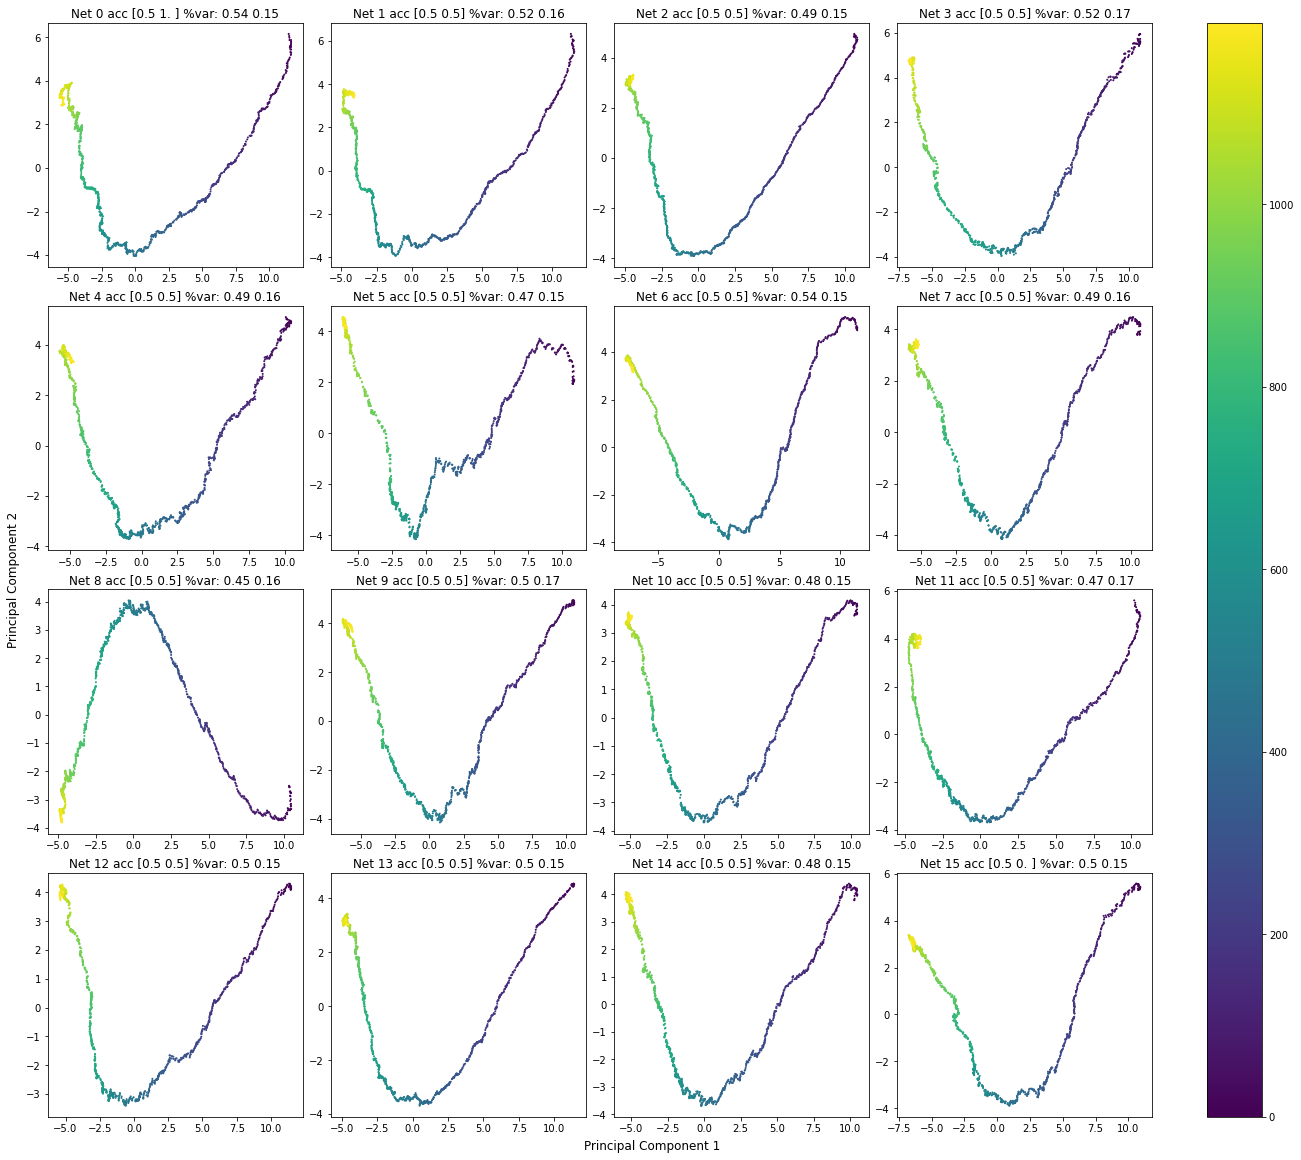

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (18,16), constrained_layout=True)#create figure

for i in range(numNetworks):#loop through countries
    # countryData = data.loc[data['country'] == country]#select data for single country
    # countryData = countryData.drop(['country', 'date'],axis=1).dropna()#remove non numeric cols
    netTrainingWeights = trainingWeights[i]
    
    # # normalise data and add to new df
    # countryData_normalised = pd.DataFrame()
    # for col in countryData.columns:
    #     countryData_normalised[col] = normalise_z_score(countryData[col].astype(float))

    #create PCA object and fit it
    pca = PCA(n_components = 2)
    pca.fit(netTrainingWeights)
    netTrainingWeights_transformed = pca.transform(netTrainingWeights)
    
    #make subplot for country
    ax = axes.flat[i]
    coloring = np.array(range(netTrainingWeights.shape[0])).reshape(netTrainingWeights.shape[0],1)
    netTrainingWeights_transformed = np.concatenate((netTrainingWeights_transformed, coloring), axis=1)
    points = ax.scatter(netTrainingWeights_transformed[:,0], netTrainingWeights_transformed[:,1], s = 1, c=coloring, cmap='viridis')
    
    #uncomment end of line to eadd explained variance
    ax.title.set_text("Net " + str(i) + " acc " + str(accuracies[i]) + " %var: " + str(round(pca.explained_variance_ratio_[0],2)) + " " + str(round(pca.explained_variance_ratio_[1],2)))
    
#set all globa plot labels etc and save
fig.supxlabel('Principal Component 1')
fig.supylabel('Principal Component 2')
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.colorbar(points, ax=axes.ravel().tolist())
plt.savefig('figures/PCA1.jpg', bbox_inches='tight')

In [14]:

netTrainingWeights = trainingWeights[0]
coloring = np.array(range(netTrainingWeights.shape[0])).reshape(1,netTrainingWeights.shape[0])#what variable to color PCA plot by
# netTrainingWeights.shape
# netTrainingWeights_transformed = np.r_[netTrainingWeights_transformed, coloring]

In [15]:
display(netTrainingWeights.transpose().shape)
display(coloring.transpose().shape)
display(netTrainingWeights_transformed.shape)

(2000, 1200)

(1200, 1)

(1200, 3)

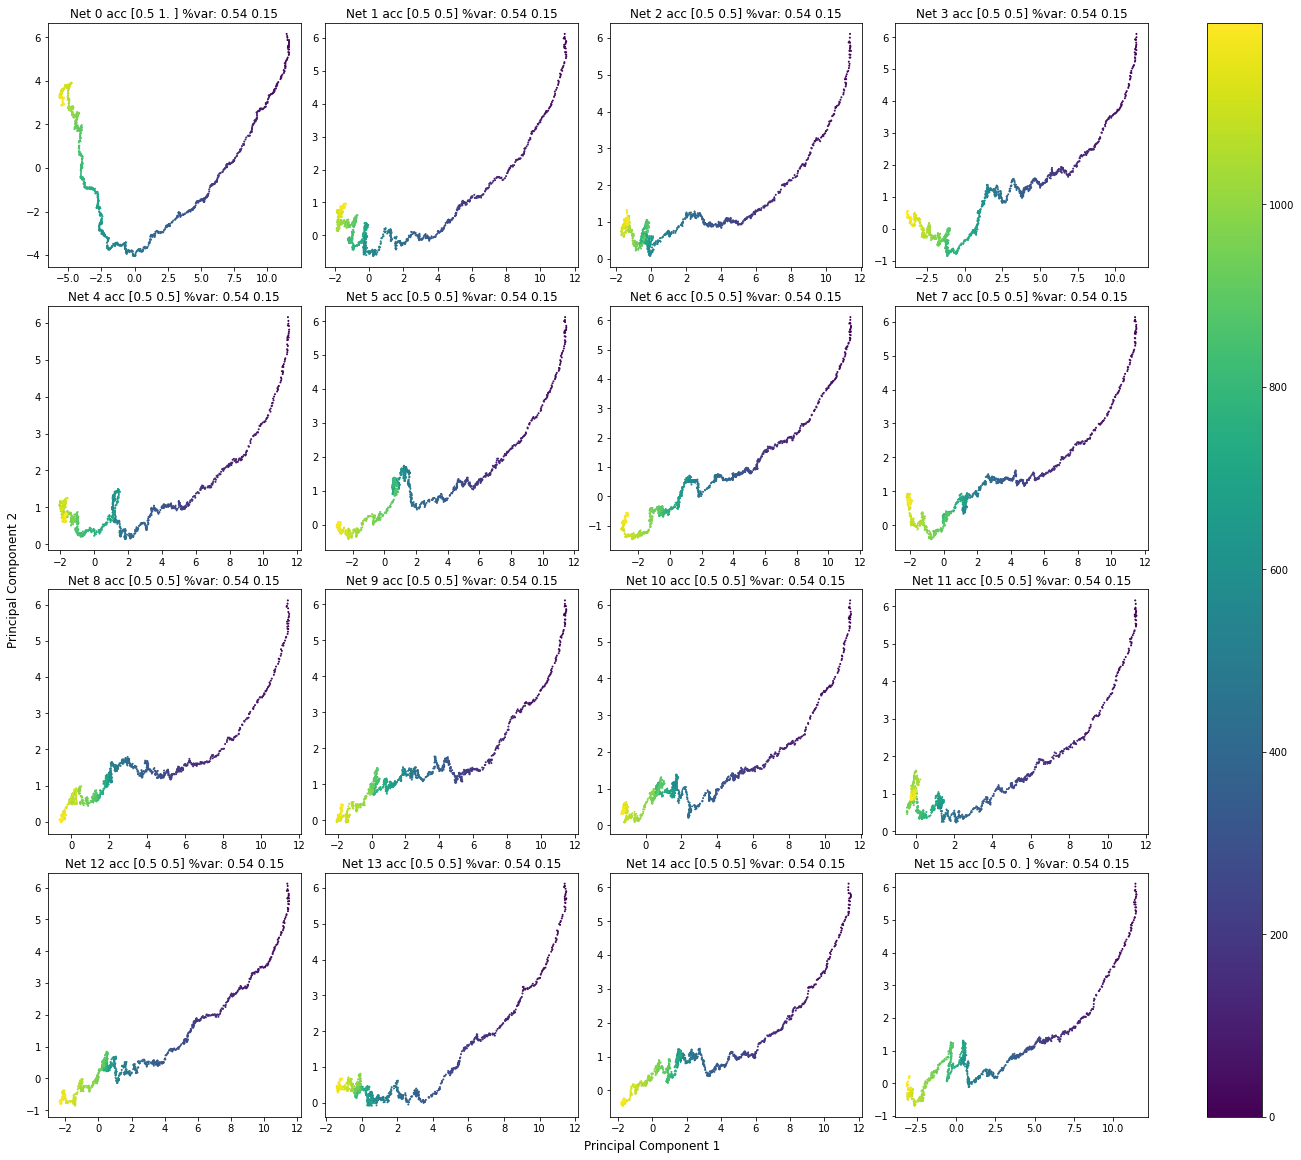

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (18,16), constrained_layout=True)#create figure
netTrainingWeights = trainingWeights[0]
pca = PCA(n_components = 2)
pca.fit(netTrainingWeights)

for i in range(numNetworks):#loop through countries
    # countryData = data.loc[data['country'] == country]#select data for single country
    # countryData = countryData.drop(['country', 'date'],axis=1).dropna()#remove non numeric cols
    netTrainingWeights = trainingWeights[i]
    
    # # normalise data and add to new df
    # countryData_normalised = pd.DataFrame()
    # for col in countryData.columns:
    #     countryData_normalised[col] = normalise_z_score(countryData[col].astype(float))

    #create PCA object and fit it

    netTrainingWeights_transformed = pca.transform(netTrainingWeights)
    
    #make subplot for country
    ax = axes.flat[i]
    coloring = np.array(range(netTrainingWeights.shape[0])).reshape(netTrainingWeights.shape[0],1)#what variable to color PCA plot by
    netTrainingWeights_transformed = np.concatenate((netTrainingWeights_transformed, coloring), axis=1)
    points = ax.scatter(netTrainingWeights_transformed[:,0], netTrainingWeights_transformed[:,1], s = 1, c=coloring, cmap='viridis')
    
    #uncomment end of line to eadd explained variance
    ax.title.set_text("Net " + str(i) + " acc " + str(accuracies[i]) + " %var: " + str(round(pca.explained_variance_ratio_[0],2)) + " " + str(round(pca.explained_variance_ratio_[1],2)))
    
#set all globa plot labels etc and save
fig.supxlabel('Principal Component 1')
fig.supylabel('Principal Component 2')
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.colorbar(points, ax=axes.ravel().tolist())
plt.savefig('figures/PCA2.jpg', bbox_inches='tight')

In [17]:
trainingWeights.shape
trainingWeights_flat = trainingWeights.reshape(-1, trainingWeights.shape[-1])
trainingWeights_flat.shape

(19200, 2000)

array([0.28111614, 0.04764699, 0.03703202, 0.02622709, 0.02457055,
       0.02144505, 0.02055466, 0.02004043, 0.01925575, 0.01880282])

array([17.7384438 ,  3.00652779,  2.33672269,  1.65493069,  1.55040297,
        1.3531841 ,  1.29699998,  1.26455212,  1.21503884,  1.18645926])

(19200, 11)


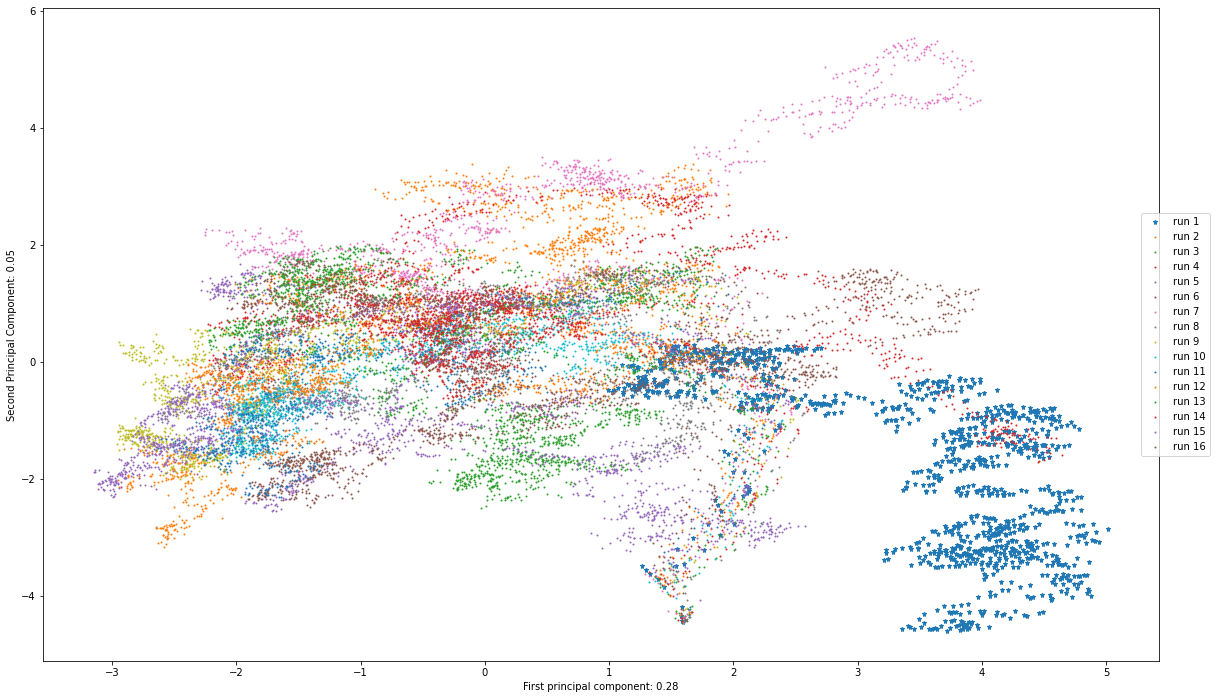

In [57]:
#flattened dataset
trainingWeights_flat = trainingWeights.reshape(-1, trainingWeights.shape[-1])

#do pca on whole dataset with all countries
pca = PCA(n_components = 10)
pca.fit(trainingWeights_flat)
trainingWeights_flat_transformed = pca.transform(trainingWeights_flat)
display(pca.explained_variance_ratio_, pca.explained_variance_)


plt.figure(figsize=(20,12))
components = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']
selectedComp = [1,2] #components selected to be displayed

# coloring = np.array(data['country']).reshape(data['country'].size,1) #re add country labels after pca so we can color by country
# data_transformed2 = np.append(trainingWeights_flat_transformed, coloring, axis=1)
coloring = np.array([i for i in range(1, numNetworks+1) for _ in range(1200)]).reshape(numNetworks*1200,1)
trainingWeights_flat_transformed = np.concatenate((trainingWeights_flat_transformed, coloring), axis=1)
print(trainingWeights_flat_transformed.shape)

trainingWeights_flat_transformed = pd.DataFrame(trainingWeights_flat_transformed, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'run']).groupby('run')
for index, group in trainingWeights_flat_transformed:
    # print(group['pc1'])
    if index == 1: #well trained network
        marker = '*'
        markersize = 5
    else: #all other networks
        marker = '.'
        markersize = 2
    plt.plot(group[components[selectedComp[0]]],group[components[selectedComp[1]]], marker=marker, linestyle='', markersize=markersize, label= "run " + str(int(index)))
plt.xlabel('First principal component: ' + str(round(pca.explained_variance_ratio_[0],2)))
plt.ylabel('Second Principal Component: '+ str(round(pca.explained_variance_ratio_[1],2)))
plt.legend(bbox_to_anchor=(1.05,0.5),loc = 'right')
plt.savefig('figures/pcaAllNet.png', bbox_inches='tight')

(2000, 10)


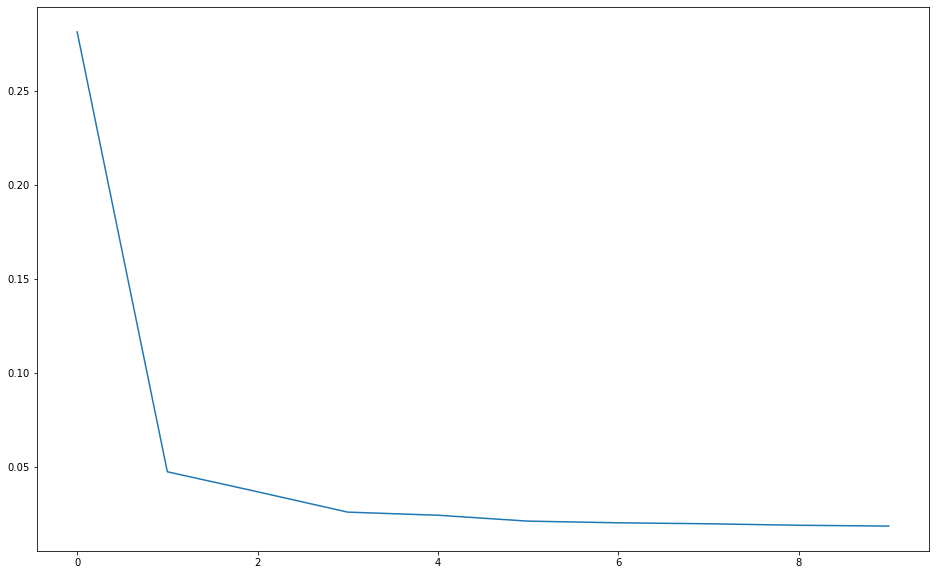

In [19]:
loadings = pd.DataFrame(pca.components_.T)
plt.figure(figsize=(16,10))
# plt.hist(loadings)
print(loadings.shape)

plt.plot(pca.explained_variance_ratio_)

# CCA


# UMAP


In [42]:
trainingWeights_flat = trainingWeights.reshape(-1, trainingWeights.shape[-1])
coloring = np.array([i for i in range(1, numNetworks+1) for _ in range(1200)]).reshape(numNetworks*1200,1).ravel().astype(str)

coloring.shape

(19200,)

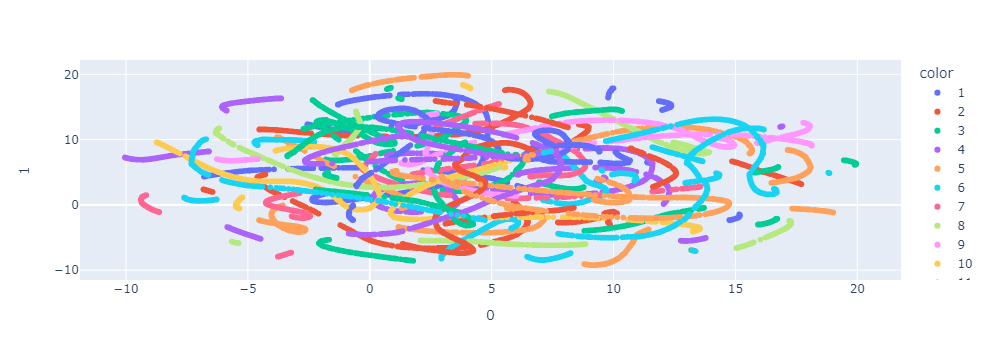

In [45]:

#We finally create the umap embedding by stating the number of components,
umap_4d = UMAP(n_components=2, init='random', random_state=0)

#And we embed the data following the specifications above.
proj_4d = umap_4d.fit_transform(trainingWeights_flat)

#Finally, we can visualize the embeddings with the use of scatterplots
fig_2d1 = px.scatter(
    proj_4d, x=0, y=1,
    color=coloring
)

fig_2d1.show()

# LPP

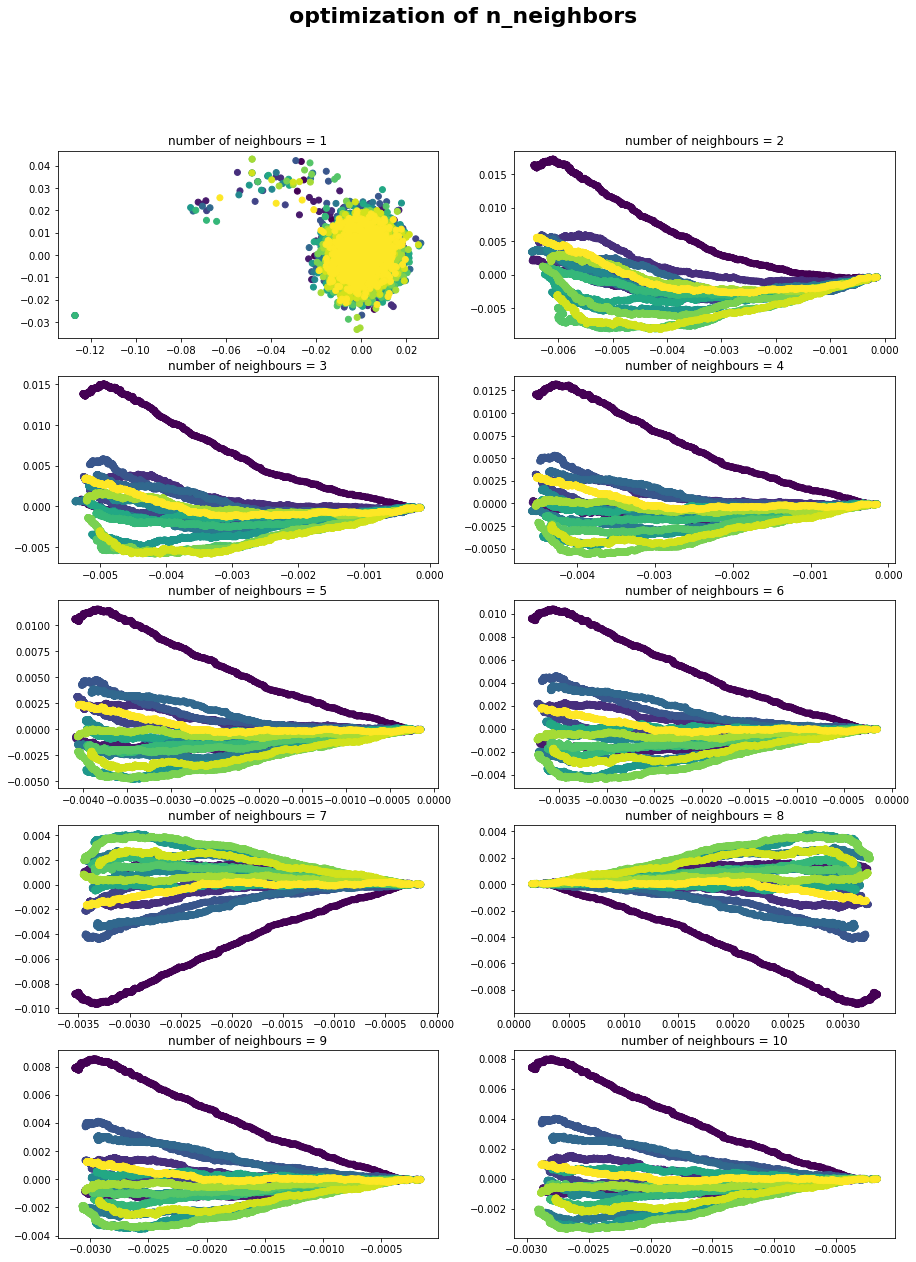

In [54]:
coloring = np.array([i for i in range(1, numNetworks+1) for _ in range(1200)]).reshape(numNetworks*1200,1).ravel()

#we create a loop to find the optimal value of number of neighbours to perform LPP
plt.figure(figsize=(15,20))
plt.suptitle('optimization of n_neighbors', fontsize=22, fontweight='bold')
for i in np.arange(1,11):
    lpp = LocalityPreservingProjection(n_components=4, n_neighbors=i) #We initialize the algorithm for "i" neighbors
    X_2D = lpp.fit_transform(trainingWeights_flat) #And we perform the LPP on the data
    ax = plt.subplot(5, 2, i)
    ax.scatter(X_2D[:,0],X_2D[:,1],c=coloring)
    ax.set_title('number of neighbours = '+ str(i))
#we can see that from n=2 the results are consistent, do not really influence the structure of the data. The predefined
#value for this variable is n=5, so we are going for that.
plt.savefig('figures/lppAllNet.png', bbox_inches='tight')

In [ ]:
lpp = LocalityPreservingProjection(n_components=4) #We initialize the algorithm
X_2D = lpp.fit_transform(trainingWeights_flat) #And we perform the LPP on the data

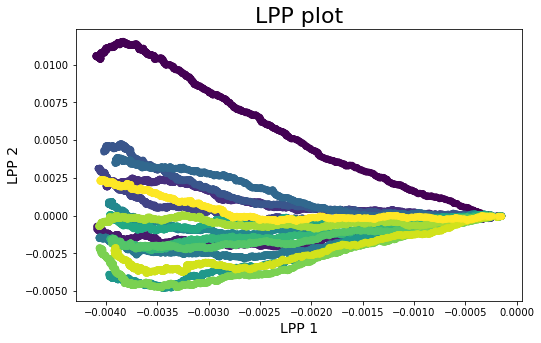

In [58]:

#we create the figure
plt.figure(figsize=(8,5))
plt.scatter(X_2D[:,0],X_2D[:,1],c=coloring) #plot the first two dimensions coloured by the timepoint.
plt.title('LPP plot',fontsize=22)
plt.xlabel('LPP 1',fontsize=14)
plt.ylabel('LPP 2',fontsize=14)

#and we create the legend
# blue = mpatches.Patch(color='tab:blue', label='t: '+str(-1))
# green = mpatches.Patch(color='tab:green', label='t: '+str(0))
# orange = mpatches.Patch(color='tab:orange', label='t: '+str(2))
# red = mpatches.Patch(color='tab:red', label='t: '+str(4))
# purple = mpatches.Patch(color='tab:purple', label='t: '+str(8))
# pink = mpatches.Patch(color='tab:pink', label='t: '+str(20))
# plt.legend(handles=[blue,green,orange,red,purple,pink])

plt.show() 